This script generates hillslope mesh with a varying organic layer thickness at the top.

In [1]:
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools','meshing','meshing_ats'))
import meshing_ats

import numpy as np
from matplotlib import pyplot as plt

In [2]:
import importlib
importlib.reload(meshing_ats)

<module 'meshing_ats' from '/home/rk/ats_rk/amanzi/src/physics/ats/tools/meshing/meshing_ats/meshing_ats.py'>

# of x and z elements:  101 ,  101
# of cells:  100


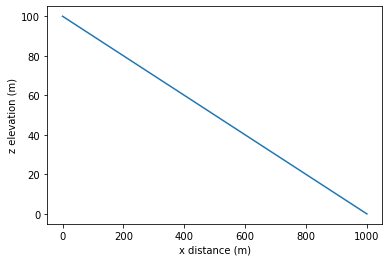

In [3]:
# 1 km long hillslope, 10% slope
x = np.linspace(0,1000,101)
z = 100 - 0.1*x 
# Gradient = 100/1000 = 0.1
print ('# of x and z elements: ',len(x),', ',len(z))
plt.plot(x,z)
plt.xlabel('x distance (m)')
plt.ylabel('z elevation (m)')
m2 = meshing_ats.Mesh2D.from_Transect(x,z) # Creates a recatangular mesh with x + z nodes, x - 1 number of cells
print ('# of cells: ', m2.num_cells())

In [4]:
m2.num_cells(), m2.num_nodes(), m2.num_nodes(), m2.coords[:,0], m2.num_edges(), m2.coords[:,0]

(100,
 202,
 202,
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
         180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,
         270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,
         360.,  370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,
         450.,  460.,  470.,  480.,  490.,  500.,  510.,  520.,  530.,
         540.,  550.,  560.,  570.,  580.,  590.,  600.,  610.,  620.,
         630.,  640.,  650.,  660.,  670.,  680.,  690.,  700.,  710.,
         720.,  730.,  740.,  750.,  760.,  770.,  780.,  790.,  800.,
         810.,  820.,  830.,  840.,  850.,  860.,  870.,  880.,  890.,
         900.,  910.,  920.,  930.,  940.,  950.,  960.,  970.,  980.,
         990., 1000.,    0.,   10.,   20.,   30.,   40.,   50.,   60.,
          70.,   80.,   90.,  100.,  110.,  120.,  130.,  140.,  150.,
         160.,  170.,  180.,  190.,  200.,  210.,  220.,  2

Text(0, 0.5, 'org. layer thickness (m)')

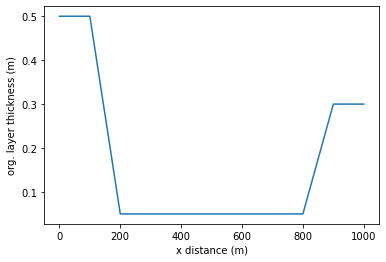

In [5]:
# Changing organic layer thickness 
def organic_thickness(x):
    """This function is the thickness of the layer we want to vary"""
    if x < 100:
        thickness = 0.5
    elif ((100 <= x) and (x <= 200)):
        thickness = -0.0045*x + 0.95
    elif ((200 < x) and (x < 800)):
        thickness = 0.05
    elif ((800 <= x) and (x <= 900)):
        thickness = 0.0025*x - 1.95
    else:
        thickness = 0.3
    return thickness

org_layer_thickness = np.array([organic_thickness(xx) for xx in m2.coords[:,0]])
plt.plot(x, org_layer_thickness[0:101])
plt.xlabel('x distance (m)')
plt.ylabel('org. layer thickness (m)')


In [6]:
len(org_layer_thickness)

202

In [7]:
org_layer_thickness

array([0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  ,
       0.5  , 0.5  , 0.455, 0.41 , 0.365, 0.32 , 0.275, 0.23 , 0.185,
       0.14 , 0.095, 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 ,
       0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 ,
       0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 ,
       0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 ,
       0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 ,
       0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 ,
       0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 ,
       0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  , 0.225, 0.25 , 0.275,
       0.3  , 0.3  , 0.3  , 0.3  , 0.3  , 0.3  , 0.3  , 0.3  , 0.3  ,
       0.3  , 0.3  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  ,
       0.5  , 0.5  , 0.5  , 0.5  , 0.455, 0.41 , 0.365, 0.32 , 0.275,
       0.23 , 0.185, 0.14 , 0.095, 0.05 , 0.05 , 0.05 , 0.05 , 0.05 ,
       0.05 , 0.05 ,

In [8]:
# preparing layer extrusion data for meshing_ats
#
# Meshes are extruded in the vertical by "layer", where a layer may 
# consist of multiple cells in the z direction.  These layers are 
# logical unit to make construction easier, and may or may not 
# correspond to material type (organic/mineral soil).
# 
# The extrusion process is then given four lists, each of length
# num_layers.
#
layer_types = []  # a list of strings that tell the extruding 
                  # code how to do the layers.  See meshing_ats 
                  # documentation for more, but here we will use
                  # only "constant", which means that dz within
                  # the layer is constant.

layer_data = []   # this data depends upon the layer type, but
                  # for constant is the thickness of the layer

layer_ncells = [] # number of cells (in the vertical) in the layer.
                  # The dz of each cell is the layer thickness / number of cells.

layer_mat_ids = []# The material ID.  This may be either a constant int (for
                  # unform layering) or an array of size [ncells_vertical x ncells_horizontal] in the layer 
                  # where each entry corresponds to the material ID of that cell.

layer_depth = []  # used later to get the mat ids right, just for bookkeeping
        
# here we will only use 1 cell per layer, so layer thickness = dz.
# We will also telescope the mesh, starting at 1cm grid cell and growing it larger in each layer.
dz = .01
i = 0
current_depth = 0
while dz < 2:
    if i<=20:            #organic
        dz *= 1.2
    elif (20<i)&(i<=26): #mineral
        dz *= 1.4
    else:                #bedrock
        dz *= 1.5
    layer_types.append("constant")
    layer_data.append(dz) # Thickness of all the dz's will be added in the numpy array 
    layer_ncells.append(1)
    current_depth += dz
    layer_depth.append(current_depth)
    i += 1
    
#print(layer_data) # Printing all the dz
#print('\n')
#print(layer_depth)

# now add in a bunch of cells to reach 45 m, of equal dz that is ~2m.
num_of_layers=len(layer_data)
layer_types.append('constant')
layer_data.append(45 - sum(layer_data))  # note sum(layer_data) == the total mesh thickness at this point
layer_ncells.append(int(np.floor(layer_data[-1]/dz)))
layer_depth.append(45)

Text(0.5, 0, 'Number of cells')

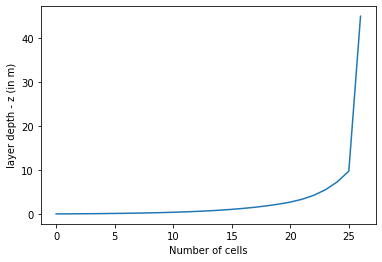

In [9]:
plt.plot(layer_depth)
plt.ylabel('layer depth - z (in m)')
plt.xlabel('Number of cells')

In [10]:
# allocate 2D matrix with cols=#cells, rows=21

mat_ids=np.zeros((m2.num_cells(), 21), 'i') # Number of columns = 100
for i in range(m2.num_cells()):
    for j in range(21): # after layer 20 everything is bedrock - Q. RK - mineral and then bedrock right?
        if (layer_depth[j] < org_layer_thickness[i]):
            mat_ids[i,j]=1001
        else:
            mat_ids[i,j]=1002
            
# filling out layer_mat_ids
layer_mat_ids = []
for j in range(21):
    layer_mat_ids.append(mat_ids[:,j])
for j in range(21,sum(layer_ncells)):
    layer_mat_ids.append(101*np.ones((100,),'i'))

print('# of rows, # of cells:', np.shape(layer_mat_ids))

# of rows, # of cells: (40, 100)


In [11]:
meshing_ats.summarize_extrusion(layer_types, layer_data, layer_ncells, layer_mat_ids)

Cell summary:
------------------------------------------------------------
l_id	| c_id	|mat_id	| dz		| z_top
------------------------------------------------------------
 00 	| 00 	| 1001 	|   0.012000 	|   0.000000
 01 	| 01 	| 1001 	|   0.014400 	|   0.012000
 02 	| 02 	| 1001 	|   0.017280 	|   0.026400
 03 	| 03 	| 1001 	|   0.020736 	|   0.043680
 04 	| 04 	| 1001 	|   0.024883 	|   0.064416
 05 	| 05 	| 1001 	|   0.029860 	|   0.089299
 06 	| 06 	| 1001 	|   0.035832 	|   0.119159
 07 	| 07 	| 1001 	|   0.042998 	|   0.154991
 08 	| 08 	| 1001 	|   0.051598 	|   0.197989
 09 	| 09 	| 1001 	|   0.061917 	|   0.249587
 10 	| 10 	| 1001 	|   0.074301 	|   0.311504
 11 	| 11 	| 1001 	|   0.089161 	|   0.385805
 12 	| 12 	| 1002 	|   0.106993 	|   0.474966
 13 	| 13 	| 1002 	|   0.128392 	|   0.581959
 14 	| 14 	| 1002 	|   0.154070 	|   0.710351
 15 	| 15 	| 1002 	|   0.184884 	|   0.864421
 16 	| 16 	| 1002 	|   0.221861 	|   1.049306
 17 	| 17 	| 1002 	|   0.266233 	|   1.271167
 1

In [12]:
# Creating a copy of the variable
layer_depth_all = layer_depth[:-1].copy()

In [13]:
# Adding a 0 at the beginning 
layer_depth_all.insert(0,0.00)

In [14]:
# Copied from the summary text - Check a way to automatise it!
extra_z_depth = [12.267, 14.786, 17.3, 19.8, 22.34, 24.86, 27.375, 29.89, 32.4, 34.928, 37.446, 39.9642, 42.48, 45]
layer_depth_all.extend(extra_z_depth)

In [15]:
layer_depth_all

[0.0,
 0.012,
 0.0264,
 0.04368,
 0.064416,
 0.0892992,
 0.11915904,
 0.154990848,
 0.19798901759999998,
 0.24958682111999997,
 0.31150418534399993,
 0.3858050224127999,
 0.4749660268953599,
 0.5819592322744318,
 0.7103510787293181,
 0.8644212944751818,
 1.049305553370218,
 1.2711666640442616,
 1.537399996853114,
 1.8568799962237368,
 2.240255995468484,
 2.7003071945621806,
 3.344378873293356,
 4.246079223517002,
 5.508459713830106,
 7.275792400268451,
 9.750058161282134,
 12.267,
 14.786,
 17.3,
 19.8,
 22.34,
 24.86,
 27.375,
 29.89,
 32.4,
 34.928,
 37.446,
 39.9642,
 42.48,
 45]

In [16]:
# Finding the centroidal distance:
z_centroid_depth = np.array([])
i = 0
for i in range(len(layer_depth_all) - 1):
    avg = (layer_depth_all[i] + layer_depth_all[i+1])/2
    z_centroid_depth = np.append(z_centroid_depth, avg)
    
z_centroid_depth

array([6.00000000e-03, 1.92000000e-02, 3.50400000e-02, 5.40480000e-02,
       7.68576000e-02, 1.04229120e-01, 1.37074944e-01, 1.76489933e-01,
       2.23787919e-01, 2.80545503e-01, 3.48654604e-01, 4.30385525e-01,
       5.28462630e-01, 6.46155156e-01, 7.87386187e-01, 9.56863424e-01,
       1.16023611e+00, 1.40428333e+00, 1.69714000e+00, 2.04856800e+00,
       2.47028160e+00, 3.02234303e+00, 3.79522905e+00, 4.87726947e+00,
       6.39212606e+00, 8.51292528e+00, 1.10085291e+01, 1.35265000e+01,
       1.60430000e+01, 1.85500000e+01, 2.10700000e+01, 2.36000000e+01,
       2.61175000e+01, 2.86325000e+01, 3.11450000e+01, 3.36640000e+01,
       3.61870000e+01, 3.87051000e+01, 4.12221000e+01, 4.37400000e+01])

In [17]:
len(z_centroid_depth)

40

In [18]:
# Creating a csv file to store the centroidal distance
np.savetxt("test_org_column_centroidal_dist.csv", z_centroid_depth, delimiter=" ")

In [19]:
# make the mesh, save it as an exodus file
m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, layer_types,layer_data, layer_ncells, layer_mat_ids)
m3.write_exodus("test_organic.exo")


You are using exodus.py v 1.05 (beta-cmake), a python wrapper of some of the exodus II library.

Copyright (c) 2013, 2014, 2015, 2016, 2017 National Technology &
Engineering Solutions of Sandia, LLC (NTESS).  Under the terms of
Contract DE-NA0003525 with NTESS, the U.S. Government retains certain
rights in this software.  

Opening exodus file: test_organic.exo


TypeError: coordX

### Check with this error!!

In [1]:
# Make a column that is the same as the deepest organic layer thickness for use in spinup.
# 1 km long hillslope, 10% slope
xc = np.array([0,1])
zc = np.array([0,0])
m2c = meshing_ats.Mesh2D.from_Transect(xc,zc)
print('# of cells: ', m2c.num_cells())

NameError: name 'np' is not defined

In [ ]:
column_mat_ids = [lmi[50] for lmi in layer_mat_ids]
print(column_mat_ids)

In [58]:
m3c = meshing_ats.Mesh3D.extruded_Mesh2D(m2c, layer_types,layer_data, layer_ncells, column_mat_ids)
m3c.write_exodus("test_organic_highres_column.exo")

NameError: name 'm2c' is not defined